In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import pytz
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Load the dataset
file_path = "kathmandu.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Select only the necessary columns
filtered_df = df[['utc', 'parameter', 'value', 'unit']]

# Save the filtered dataset to a new CSV file
filtered_file_path = "filtered_dataset.csv"  # Replace with your desired output path
filtered_df.to_csv(filtered_file_path, index=False)

In [3]:
filtered_df.shape

(61976, 4)

In [4]:
df.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,o3,0.051,ppm,27.712463,85.315704
1,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,pm25,69.000,µg/m³,27.712463,85.315704
2,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,pm25,69.000,µg/m³,27.712463,85.315704
3,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,o3,0.030,ppm,27.712463,85.315704
4,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T16:15:00+00:00,2021-03-12T22:00:00+05:45,o3,0.030,ppm,27.712463,85.315704


In [5]:
# Filter the DataFrame for rows where the parameter is 'pm25'
pm25_df = filtered_df[filtered_df['parameter'] == 'pm25']

# Save the filtered DataFrame to a new CSV file
pm25_df.to_csv("pm25_dataset.csv", index=False)



In [6]:
pm25_df.shape

(31832, 4)

In [7]:
# Assuming pm25_df is your original DataFrame and 'value' is the column of interest
Q1 = pm25_df['value'].quantile(0.25)
Q3 = pm25_df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where 'value' is outside the outlier bounds
pm25_df_clean = pm25_df[(pm25_df['value'] >= lower_bound) & (pm25_df['value'] <= upper_bound)]

# If you want to overwrite the original DataFrame and remove outliers in place:
pm25_df = pm25_df[(pm25_df['value'] >= lower_bound) & (pm25_df['value'] <= upper_bound)]



In [8]:
# Drop the 'parameter' and 'unit' columns
pm25_df = pm25_df.drop(columns=['parameter', 'unit'])

# Save the updated DataFrame to a new CSV file
pm25_df.to_csv("pm25_cleaned_dataset.csv", index=False)

print(f"Cleaned dataset with 'pm25' data saved to pm25_cleaned_dataset.csv")


Cleaned dataset with 'pm25' data saved to pm25_cleaned_dataset.csv


In [9]:
pm25_df.head()


,utc,value
1,2021-03-12T18:15:00+00:00,69.0
2,2021-03-12T17:15:00+00:00,69.0
5,2021-03-12T16:15:00+00:00,60.0
6,2021-03-12T15:15:00+00:00,58.0
9,2021-03-12T14:15:00+00:00,58.0


In [10]:
pm25_df['utc'] = pd.to_datetime(pm25_df['utc'])
pm25_df.set_index('utc', inplace=True)


In [11]:
pm25_df.head()


,value
utc,
2021-03-12 18:15:00+00:00,69.0
2021-03-12 17:15:00+00:00,69.0
2021-03-12 16:15:00+00:00,60.0
2021-03-12 15:15:00+00:00,58.0
2021-03-12 14:15:00+00:00,58.0


In [12]:
y = pm25_df['value'].resample('h').mean().ffill()


In [13]:
y.head()

utc
2017-03-02 23:00:00+00:00    106.1
2017-03-03 00:00:00+00:00    134.5
2017-03-03 01:00:00+00:00    134.5
2017-03-03 02:00:00+00:00    134.5
2017-03-03 03:00:00+00:00    134.5
Freq: h, Name: value, dtype: float64

In [14]:
y.shape

(35300,)

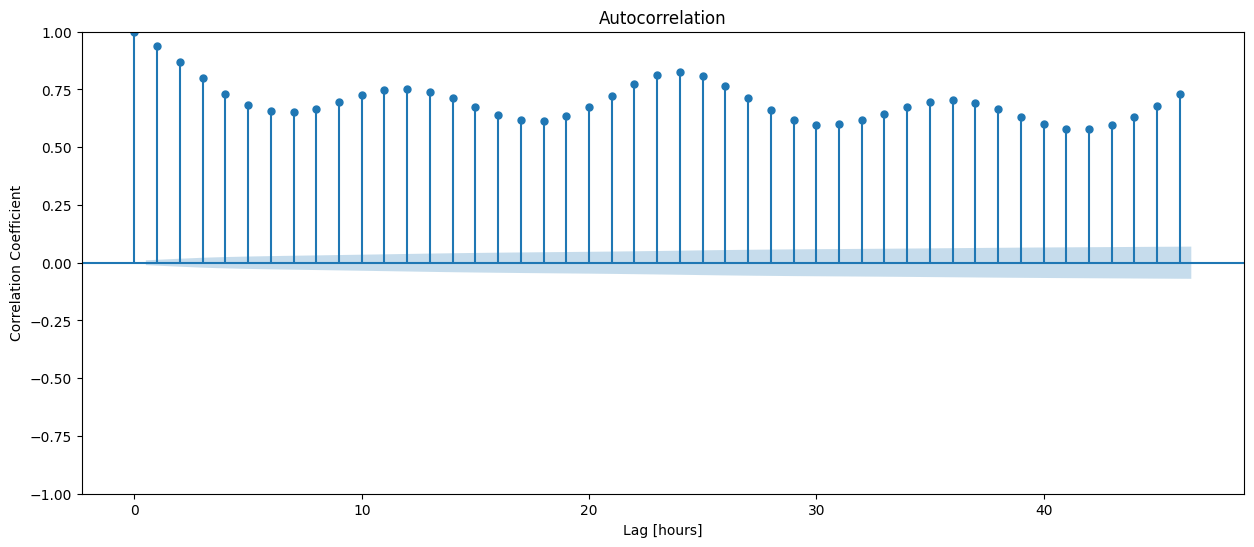

In [15]:
fig, ax= plt.subplots(figsize=(15,6))
plot_acf(y, ax=ax);
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

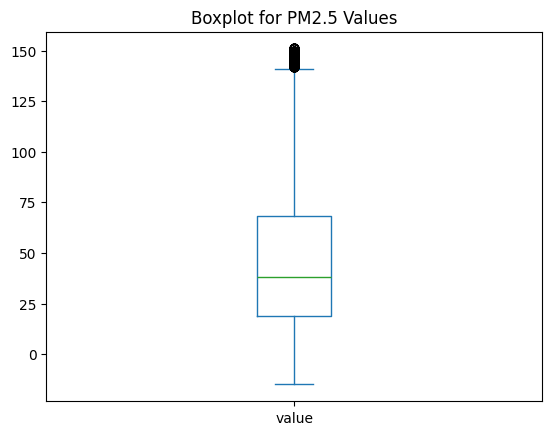

In [16]:
# Plot the boxplot for the 'value' column
pm25_df['value'].plot(kind='box')

plt.title('Boxplot for PM2.5 Values')
plt.show()


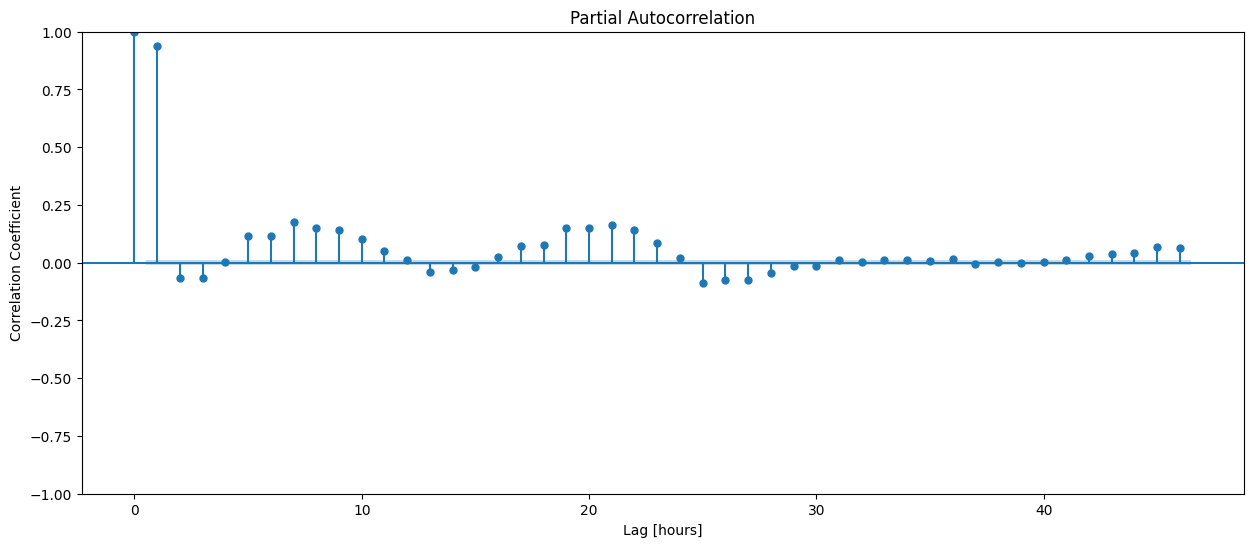

In [17]:
fig, ax= plt.subplots(figsize=(15,6))
plot_pacf(y, ax=ax);
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

In [18]:
import pandas as pd

# Define the split dates
train_end = '2019-12-31'
val_end = '2020-12-31'


# Split the data
y_train = y[:train_end]  # Data up to the end of 2019
y_val = y[train_end:val_end]  # Data from 2020
y_test = y[val_end:]  # Data from 2021 onward

# Print the sizes to confirm
print(f"Train size: {len(y_train)}")
print(f"Validation size: {len(y_val)}")
print(f"Test size: {len(y_test)}")



Train size: 24817
Validation size: 8808
Test size: 1723


In [19]:
import pandas as pd

# Define the split dates
train_end = '2019-12-31'
val_end = '2020-12-31'


# Split the data
y_train = y[:train_end]  # Data up to the end of 2019
y_val = y[train_end:val_end]  # Data from 2020
y_test = y[val_end:]  # Data from 2021 onward

# Print the sizes to confirm
print(f"Train size: {len(y_train)}")
print(f"Validation size: {len(y_val)}")
print(f"Test size: {len(y_test)}")


Train size: 24817
Validation size: 8808
Test size: 1723


In [20]:
# Calculate the mean of the training data
baseline_mean = y_train.mean()

# Create a baseline model where all predictions are the mean
mean_predictions = [baseline_mean] * len(y_val)

# Evaluate using MAE on the validation set
mean_baseline_mae = mean_absolute_error(y_val, mean_predictions)
print(f"Mean Baseline MAE: {mean_baseline_mae}")

# Use the last value of the training set as the baseline prediction for validation
persistence_predictions = y_train.iloc[-1]  # Last observed value in training

# Repeat the last value for the length of the validation set
persistence_baseline = [persistence_predictions] * len(y_val)

# Evaluate using MAE on the validation set
persistence_baseline_mae = mean_absolute_error(y_val, persistence_baseline)
print(f"Persistence Baseline MAE: {persistence_baseline_mae}")

Mean Baseline MAE: 32.58193924486369
Persistence Baseline MAE: 101.54768392370572


In [21]:

p_params= range(0, 25, 8)
q_params= range(0, 3, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import time
#Create empty dictionary for MAE values
mae_grid={}
for p in p_params:
    #Create new key in dict with empty list
    mae_grid[p]=[]
    #Set hyperparameters for model
    for q in q_params:
        order = (p, 0, q)
        start_time=time.time()
        model= ARIMA(y_train, order=order).fit()
        elapsed_time=round(time.time() - start_time, 2)
        print(f"Trained ARIMA model {order} in {elapsed_time} seconds.")
        y_pred= model.predict()
        mae= mean_absolute_error(y_train, y_pred)
        print(mae)
        #Adding MAE to dictionary
        mae_grid[p].append(mae)



Trained ARIMA model (0, 0, 0) in 2.23 seconds.
30.095038323660525
Trained ARIMA model (0, 0, 1) in 2.54 seconds.
18.609261577807786
Trained ARIMA model (0, 0, 2) in 7.02 seconds.
14.275657050317207
Trained ARIMA model (8, 0, 0) in 10.89 seconds.
7.597354120696937


/Users/anamgiri/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anamgiri/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
mae_grid

In [ ]:
mae_df= pd.DataFrame(mae_grid)
mae_df.round(4)

In [ ]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("SARIMA Grid Search(Criterion: MAE)");

In [ ]:
fig, ax= plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your dataframe and y_train, y_test are defined

y_pred_wfv = pd.DataFrame()

history = y_train.copy()  # Starting history for the model
predictions = []

# Set frequency on your index to avoid warnings
y_train = y_train.asfreq('D')  # Adjust 'D' to the frequency you need (e.g., daily)
y_test = y_test.asfreq('D')  # Make sure test set also has a frequency

for i in range(len(y_test)):
    model = ARIMA(history, order=(24, 0, 1)).fit()  # Fit ARIMA model
    next_predict = model.forecast(steps=1)  # Forecast next value
    
    predictions.append(next_predict[0])  # Collect the scalar value
    
    # Update history with the actual observed value from the test set
    history = pd.concat([history, pd.Series([y_test.iloc[i]], index=[y_test.index[i]])])

# Convert predictions list into a pandas Series
y_pred_wfv = pd.Series(predictions, index=y_test.index)

# Print or visualize the predictions
print(y_pred_wfv.head())



In [ ]:
test_mae= mean_absolute_error(y_test, y_pred_wfv)
test_mae